In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [87]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/drive/My Drive/cars_dataset.csv")

In [88]:
df= df.dropna() #eliminando filas con valores nulos
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [89]:
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt



le = preprocessing.LabelEncoder()
df["fuel"] = le.fit_transform(df["fuel"])
df["seller_type"] = le.fit_transform(df["seller_type"])
df["transmission"] = le.fit_transform(df["transmission"])
df["owner"] = le.fit_transform(df["owner"])
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,1,1,1,0,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,1,1,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,3,1,1,4,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,1,1,0,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,3,1,1,0,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,3,1,1,0,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,1,1,1,1,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,1,1,1,0,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,1,1,1,0,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [90]:
nombres = np.array(df.name)
soloMarcas = []
for i in nombres:
  add = i.split()
  soloMarcas.append(add[0])
df['name']=soloMarcas # extraer solo la marca del auto para hacer mas facil la predicción
df["name"] = le.fit_transform(df["name"]) #convirtiendo las marcas de los autos en escalares
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,20,2014,450000,145500,1,1,1,0,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,26,2014,370000,120000,1,1,1,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,10,2006,158000,140000,3,1,1,4,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,11,2010,225000,127000,1,1,1,0,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,20,2007,130000,120000,3,1,1,0,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,11,2013,320000,110000,3,1,1,0,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,11,2007,135000,119000,1,1,1,1,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,20,2009,382000,120000,1,1,1,0,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,27,2013,290000,25000,1,1,1,0,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [91]:
import re  #para extraer los numeros de las cadenas en cada columna

#KILOMETRAJE
kilometrajes = np.array(df.mileage)
kilometraje = []

for i in kilometrajes:
  s = [float(s) for s in re.findall(r'-?\d+\.?\d*', i)]
  kilometraje.append(s[0])
df['mileage']= kilometraje
#ENGINE/MOTOR
motores = np.array(df.engine)
motor = []
for i in motores:
  s = [float(s) for s in re.findall(r'-?\d+\.?\d*', i)]
  motor.append(s[0])
df['engine']= motor
#MAXIMO PODER
maximos = np.array(df.max_power)
maximo = []
for i in maximos:
  s = [float(s) for s in re.findall(r'-?\d+\.?\d*', i)]
  maximo.append(s[0])
df['max_power']= maximo
#TORQUE
df["torque"] = le.fit_transform(df["torque"])

#MOVIENDO PRECIO COMO ÚLTIMA COLUMNA

df = df.reindex(columns=['name','year','km_driven','fuel','seller_type','transmission','owner','mileage','engine','max_power','torque','seats','selling_price'])
df

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price
0,20,2014,145500,1,1,1,0,23.40,1248.0,74.00,178,5.0,450000
1,26,2014,120000,1,1,1,2,21.14,1498.0,103.52,260,5.0,370000
2,10,2006,140000,3,1,1,4,17.70,1497.0,78.00,66,5.0,158000
3,11,2010,127000,1,1,1,0,23.00,1396.0,90.00,224,5.0,225000
4,20,2007,120000,3,1,1,0,16.10,1298.0,88.20,21,5.0,130000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,11,2013,110000,3,1,1,0,18.50,1197.0,82.85,37,5.0,320000
8124,11,2007,119000,1,1,1,1,16.80,1493.0,110.00,250,5.0,135000
8125,20,2009,120000,1,1,1,0,19.30,1248.0,73.90,178,5.0,382000
8126,27,2013,25000,1,1,1,0,23.57,1396.0,70.00,106,5.0,290000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


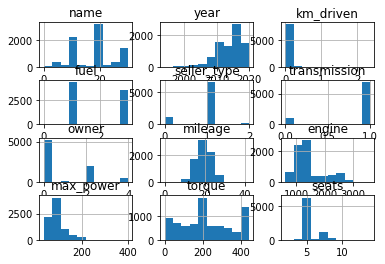

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price
0,20,2014,145500,1,1,1,0,23.40,1248.0,74.00,178,5.0,450000
1,26,2014,120000,1,1,1,2,21.14,1498.0,103.52,260,5.0,370000
2,10,2006,140000,3,1,1,4,17.70,1497.0,78.00,66,5.0,158000
3,11,2010,127000,1,1,1,0,23.00,1396.0,90.00,224,5.0,225000
4,20,2007,120000,3,1,1,0,16.10,1298.0,88.20,21,5.0,130000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,11,2013,110000,3,1,1,0,18.50,1197.0,82.85,37,5.0,320000
8124,11,2007,119000,1,1,1,1,16.80,1493.0,110.00,250,5.0,135000
8125,20,2009,120000,1,1,1,0,19.30,1248.0,73.90,178,5.0,382000
8126,27,2013,25000,1,1,1,0,23.57,1396.0,70.00,106,5.0,290000


In [92]:
df.drop(['selling_price'],1).hist()
plt.show()
df

In [93]:
#creando el modelo de regresión logística
from sklearn.preprocessing import StandardScaler#para normalizar datos en X
X = np.array(df.drop(['selling_price'],1))
y = np.array(df['selling_price'])

scale = StandardScaler()
X = scale.fit_transform(X)

model = linear_model.LogisticRegression()
model.fit(X,y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [94]:
predictions = model.predict(X)
print(predictions[0:20])
print(y[0:20])

[550000 400000 150000 300000 150000 550000 150000  45000 250000 200000
 400000 150000 200000 150000 550000 650000 300000  70000 550000 250000]
[450000 370000 158000 225000 130000 440000  96000  45000 350000 200000
 500000  92000 280000 180000 400000 778000 500000 150000 680000 174000]


In [95]:
model.score(X,y)

0.1527953453073615

In [97]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [103]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state=None)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Logistic Regression: 0.124449 (0.012435)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [104]:

predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.15360303413400758


In [105]:
print(confusion_matrix(Y_validation, predictions))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 2]]


In [106]:
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

       29999       0.00      0.00      0.00         1
       31000       0.00      0.00      0.00         1
       31504       0.00      0.00      0.00         1
       40000       0.17      1.00      0.29         1
       45000       0.40      0.40      0.40         5
       45957       0.00      0.00      0.00         1
       50000       0.00      0.00      0.00         1
       55000       0.00      0.00      0.00         6
       58000       0.00      0.00      0.00         1
       60000       0.00      0.00      0.00         1
       64000       0.00      0.00      0.00         1
       65000       0.00      0.00      0.00         6
       66000       1.00      1.00      1.00         1
       70000       0.17      0.25      0.20         4
       75000       0.00      0.00      0.00         3
       78000       0.00      0.00      0.00         1
       80000       0.50      0.11      0.18         9
       81000       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1